In [59]:
import numpy as np
import cv2
import pandas as pd

In [60]:
img=cv2.imread("C:/Users/ashut/Desktop/Course Project_2/svm/dataset/semantic_drone_dataset/original_images/594.jpg",cv2.IMREAD_GRAYSCALE)

In [61]:
# img.shape

img2=cv2.resize(img,(400,600))

In [62]:
df=pd.DataFrame()  # empty data frame



In [63]:
# First feature is the pixel location
# adding the original pixel values to the data frame
img_flat=img2.reshape(-1)
df['Original Image']=img_flat

In [64]:
print(df)

        Original Image
0                  158
1                  102
2                   43
3                   85
4                   91
...                ...
239995              96
239996              97
239997              98
239998              83
239999              93

[240000 rows x 1 columns]


In [65]:
# New features
# Generate Gabor features
num=1 # To count numbers up in order to give gabor features a label in the df
kernels=[]
for theta in range(2):
    theta =theta/4 * np.pi
    for sigma in (1,3):
        for lambda_ in np.arange(0,np.pi,np.pi/4): # Range of wavelengths
            for gamma in (0.05,0.5):
                gabor_label="Gabor" + str(num)  # label Gabor features as Gabor 1
                # print(gabor_label)
                ksize=5
                kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lambda_, gamma,psi=0,ktype=cv2.CV_32F)
                kernels.append(kernel)
                #Now filter the images and add values to a new column
                fimg=cv2.filter2D(img_flat,cv2.CV_8UC3,kernel)
                filtered_img=fimg.reshape(-1)
                df[gabor_label]=filtered_img
                # Labels column as Gabor 1 Gabor 2 etc.
                num+=1 # Increment for gabor column lab

# 32 filters are applied here


In [66]:
print(df)

        Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  \
0                  158       0       0     252     220      75      65   
1                  102       0       0     255     222      82      66   
2                   43       0       0     255     203      80      60   
3                   85       0       0     255     204      80      61   
4                   91       0       0     255     244      91      73   
...                ...     ...     ...     ...     ...     ...     ...   
239995              96       0       0     255     218      81      65   
239996              97       0       0     255     214      79      64   
239997              98       0       0     255     210      78      62   
239998              83       0       0     255     204      76      60   
239999              93       0       0     255     202      76      60   

        Gabor7  Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  \
0           35      31       0  ... 

In [67]:
# Adding more features

#Canny edge
edges=cv2.Canny(img2,400,600)
edges_f=edges.reshape(-1)
df['Canny Edge']=edges_f

from skimage.filters import roberts,sobel,scharr,prewitt

edge_roberts=roberts(img2)
edge_roberts_f=edge_roberts.reshape(-1)
df['Roberts']=edge_roberts_f

edge_sobel=sobel(img2)
edge_sobel_f=edge_sobel.reshape(-1)
df['Sobel']=edge_sobel_f

edge_scharr=scharr(img2)
edge_scharr_f=edge_scharr.reshape(-1)
df['Scharr']=edge_scharr_f

edge_prewitt=prewitt(img2)
edge_prewitt_f=edge_prewitt.reshape(-1)
df['Prewitt']=edge_prewitt_f





In [68]:
# Gaussian with sigma=3
from scipy import ndimage as nd 
gaussian_img=nd.gaussian_filter(img2,sigma=3)
gaussian_img_f =gaussian_img.reshape(-1)
df['Gaussian s3']=gaussian_img_f

In [69]:
#Gaussian with sigma=7
gaussian_img2=nd.gaussian_filter(img2,sigma=7)
gaussian_img3=gaussian_img2.reshape(-1)
df['Gaussian s7']=gaussian_img3

In [70]:
#MEDIAN with sigma=3
median_img=nd.median_filter(img2,size=3)
median_img1=median_img.reshape(-1)
df['Median s3']=median_img1


In [71]:
# variance_img=nd.generic_filter(img,np.var,size=3)
# variance_img1=variance_img.reshape(-1)
# df['Variance s3']=variance_img1

# As gabor includes variance

In [72]:
print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             158       0       0     252     220      75      65      35   
1             102       0       0     255     222      82      66      38   
2              43       0       0     255     203      80      60      38   
3              85       0       0     255     204      80      61      38   
4              91       0       0     255     244      91      73      43   

   Gabor8  Gabor9  ...  Gabor31  Gabor32  Canny Edge   Roberts     Sobel  \
0      31       0  ...        0        0           0  0.085603  0.109808   
1      31       0  ...      104       93           0  0.316228  0.297474   
2      28       0  ...      212      194           0  0.253859  0.084984   
3      28       0  ...      161      145           0  0.111782  0.122898   
4      34       0  ...      146      132           0  0.259772  0.128401   

     Scharr   Prewitt  Gaussian s3  Gaussian s7  Median s3  
0  0.125182  0.0904

In [73]:
# Add label column
labeled_image=cv2.imread(r"C:\Users\ashut\Desktop\Course Project_2\Random_Forest\RGB_color_image_masks\594.png",cv2.IMREAD_GRAYSCALE)

labeled_image=cv2.resize(labeled_image,(400,600))
labeled_img1=labeled_image.reshape(-1)
df['Label']=labeled_img1

In [74]:
print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             158       0       0     252     220      75      65      35   
1             102       0       0     255     222      82      66      38   
2              43       0       0     255     203      80      60      38   
3              85       0       0     255     204      80      61      38   
4              91       0       0     255     244      91      73      43   

   Gabor8  Gabor9  ...  Gabor32  Canny Edge   Roberts     Sobel    Scharr  \
0      31       0  ...        0           0  0.085603  0.109808  0.125182   
1      31       0  ...       93           0  0.316228  0.297474  0.306947   
2      28       0  ...      194           0  0.253859  0.084984  0.075191   
3      28       0  ...      145           0  0.111782  0.122898  0.135385   
4      34       0  ...      132           0  0.259772  0.128401  0.148750   

    Prewitt  Gaussian s3  Gaussian s7  Median s3  Label  
0  0.090461     

In [75]:
Y=df['Label'].values

In [76]:
X=df.drop(labels=['Label'],axis=1)

In [77]:
X.shape

(240000, 41)

In [78]:
# Split the data into test and train data
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.4,random_state=1)


In [79]:
print(X_train.shape)

(144000, 41)


In [80]:
# Import ML algorithm and train the model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20,random_state=23)

model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=23)

In [81]:
prediction=model.predict(X_test)

In [82]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(Y_test,prediction))

Accuracy= 0.8068125


In [83]:

importances=list(model.feature_importances_)
features_list=list(X.columns)
feature_imp=pd.Series(model.feature_importances_,index=features_list).sort_values(ascending=False)
print(feature_imp)

Gaussian s7       0.103195
Roberts           0.083973
Median s3         0.077393
Sobel             0.069132
Gaussian s3       0.064351
Scharr            0.060914
Prewitt           0.054711
Gabor15           0.045896
Gabor8            0.037081
Original Image    0.033512
Gabor16           0.033346
Gabor21           0.031964
Gabor6            0.029437
Gabor5            0.029043
Gabor32           0.028617
Gabor31           0.026742
Gabor24           0.025527
Gabor30           0.025094
Gabor29           0.024859
Gabor23           0.020965
Gabor22           0.017147
Gabor7            0.016984
Gabor4            0.016777
Gabor3            0.015352
Gabor20           0.007901
Gabor28           0.006910
Gabor27           0.006017
Gabor19           0.004986
Canny Edge        0.002176
Gabor2            0.000000
Gabor10           0.000000
Gabor26           0.000000
Gabor11           0.000000
Gabor1            0.000000
Gabor18           0.000000
Gabor17           0.000000
Gabor9            0.000000
G

In [84]:
# Store this model and use for future
import pickle
filename='Drone Model'
pickle.dump(model,open(filename,'wb'))


In [85]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.predict(X)

Text(0.5, 1.0, 'Ground truth segmentation')

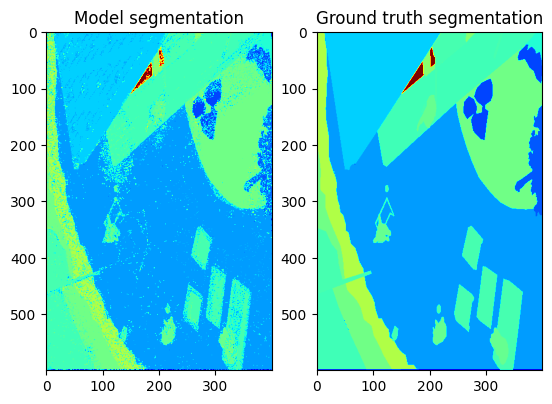

In [86]:
segmented=result.reshape((img2.shape))
from matplotlib import pyplot as plt
plt.subplot(121)
plt.imshow(segmented,cmap='jet')
plt.imsave('segmented_drone.jpg',segmented,cmap='jet')
plt.title("Model segmentation")
plt.subplot(122)
plt.imshow(labeled_image,cmap='jet')
plt.title("Ground truth segmentation")
